In [1]:
from math import sqrt
import numpy as np

class knn:
    def __init__(self):
        self.X = None
        self.Y = None

    # Calculate the Euclidean distance between two vectors
    def euclidean_distance(self, row1, row2):
        distance = 0.0
        subtract = np.subtract(row1, row2)
        for s in subtract:
            distance += s*s
        
        return sqrt(distance)

    # Locate the most similar neighbors
    def get_neighbors(self, test_row, num_neighbors):
        distances = list()
        for train_row, train_label in zip(self.X, self.Y):
            dist = self.euclidean_distance(test_row, train_row)
            distances.append((train_row, train_label, dist))
        distances.sort(key=lambda tup: tup[2])

        neighbors = np.array([])
        for i in range(num_neighbors):
            neighbors = np.append(neighbors, distances[i][1])

        return neighbors

    def fit(self, X, Y):
        self.X = X
        self.Y = Y

    # Make a prediction with neighbors
    def predict(self, test, num_neighbors):
        predictions = np.array([])
        for test_row in test:
            neighbors = self.get_neighbors(test_row, num_neighbors)
            values, counts = np.unique(neighbors, return_counts=True)
            ind = np.argmax(counts)
            predictions = np.append(predictions, values[ind])
    
        return predictions
        

Split dataset into a train, test and validation

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

mnist = datasets.load_digits()

X, y = mnist["data"], mnist["target"]
X, X_test, y, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2)

After trying different "k"s and distance functions I found that k= and d= works best.<br/>
Report Train, validation and test error

In [3]:
from sklearn.metrics import mean_squared_error

clf = knn()
y_train = y_train.reshape(-1, 1)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train, 5)
train_err = mean_squared_error(y_train, y_train_pred)
print("train error= ", train_err)

y_val_pred = clf.predict(X_val, 5)
validation_err = mean_squared_error(y_val, y_val_pred)
print("validation error= ", validation_err)

y_test_pred = clf.predict(X_test, 5)
test_err = mean_squared_error(y_test, y_test_pred)
print("test error= ", test_err)

train error=  0.2924281984334204
validation error=  0.4375
test error=  0.08611111111111111


Report confusion matrix

In [4]:
from sklearn.metrics import confusion_matrix

print("train confusion matrix")
print(confusion_matrix(y_train, y_train_pred))

print("validation confusion matrix")
print(confusion_matrix(y_val, y_val_pred))

print("test confusion matrix")
print(confusion_matrix(y_test, y_test_pred))

train confusion matrix
[[114   0   0   0   0   0   0   0   0   0]
 [  0 117   0   0   0   0   0   0   0   0]
 [  0   0 112   0   0   0   0   1   0   0]
 [  0   0   0 114   0   0   0   2   1   0]
 [  0   1   0   0 114   0   0   0   0   1]
 [  0   0   0   0   0 114   1   0   0   1]
 [  0   0   0   0   0   0 116   0   0   0]
 [  0   0   0   0   0   0   0 114   0   0]
 [  0   3   0   0   0   0   1   0 107   0]
 [  0   0   0   1   0   1   0   0   0 113]]
validation confusion matrix
[[28  0  0  0  0  0  0  0  0  0]
 [ 0 29  0  0  0  0  0  0  0  0]
 [ 0  0 29  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 28  0  0  1  0  0]
 [ 0  0  0  0  0 29  0  0  0  0]
 [ 0  0  0  0  0  0 29  0  0  0]
 [ 0  0  0  0  0  0  0 29  0  0]
 [ 0  0  0  0  0  0  0  0 28  0]
 [ 0  1  0  1  0  1  0  0  1 25]]
test confusion matrix
[[36  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  1  0  0  0  0]
 [ 0  0  0  0 34  0  0  1  1  0]


Predict and show images

y_pred 8.0 / y_org 8


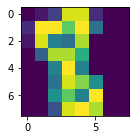

y_pred 9.0 / y_org 9


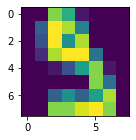

y_pred 3.0 / y_org 3


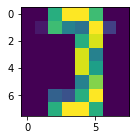

y_pred 6.0 / y_org 6


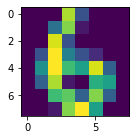

y_pred 0.0 / y_org 0


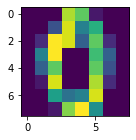

y_pred 7.0 / y_org 4


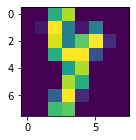

y_pred 7.0 / y_org 7


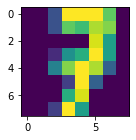

y_pred 7.0 / y_org 7


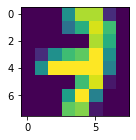

y_pred 0.0 / y_org 0


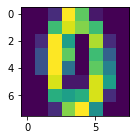

y_pred 0.0 / y_org 0


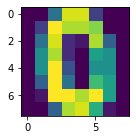

In [5]:
import matplotlib.pyplot as plt

for i in range(10):
    print("y_pred {} / y_org {}".format(y_test_pred[i], y_test[i]))
    plt.figure(figsize=(2, 2))

    plt.imshow(X_test[i,:].reshape(8,8))
    plt.show()

Do previous steps with sklearn

In [6]:
from sklearn.neighbors import KNeighborsClassifier

sklearn_clf = KNeighborsClassifier(n_neighbors=5)
sklearn_clf.fit(X_train, y_train)

y_train_pred = sklearn_clf.predict(X_train)
train_err = mean_squared_error(y_train, y_train_pred)
print("train error= ", train_err)

y_val_pred = sklearn_clf.predict(X_val)
validation_err = mean_squared_error(y_val, y_val_pred)
print("validation error= ", validation_err)

y_test_pred = sklearn_clf.predict(X_test)
test_err = mean_squared_error(y_test, y_test_pred)
print("test error= ", test_err)

train error=  0.2924281984334204
validation error=  0.4375
test error=  0.08611111111111111


/home/raha/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [7]:
from sklearn.metrics import confusion_matrix

print("train confusion matrix")
print(confusion_matrix(y_train, y_train_pred))

print("validation confusion matrix")
print(confusion_matrix(y_val, y_val_pred))

print("test confusion matrix")
print(confusion_matrix(y_test, y_test_pred))

train confusion matrix
validation confusion matrix
test confusion matrix


array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 34,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1, 34,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 35]])

y_pred 8 / y_org 8


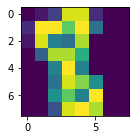

y_pred 9 / y_org 9


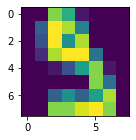

y_pred 3 / y_org 3


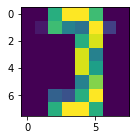

y_pred 6 / y_org 6


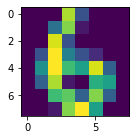

y_pred 0 / y_org 0


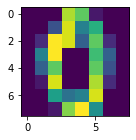

y_pred 7 / y_org 4


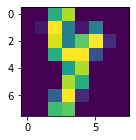

y_pred 7 / y_org 7


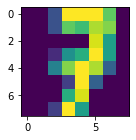

y_pred 7 / y_org 7


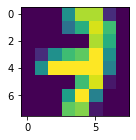

y_pred 0 / y_org 0


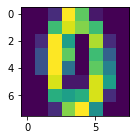

y_pred 0 / y_org 0


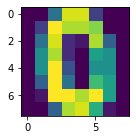

In [8]:
import matplotlib.pyplot as plt

for i in range(10):
    print("y_pred {} / y_org {}".format(y_test_pred[i], y_test[i]))
    plt.figure(figsize=(2, 2))

    plt.imshow(X_test[i,:].reshape(8,8))
    
    plt.show()

